# in this notebook, results of two experiments with the same seed on Håkan and Saeid's computer has been shown

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [2]:
from scr.RQ1_forecast import *

In [3]:
num_samples = 100

In [4]:
data_address1 = '/home/dev/deepts/experiments/tf_lstm/electricity/1B'

# Forecast section

In [27]:
# read the forecast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1, n_files=100)
# forcast_list2 = read_csv_result('forecasts.csv', data_address2, n_files=100)

101it [00:00, 27965.72it/s]
100%|###########| 100/100 [00:03<00:00, 30.95it/s]


In [28]:
len(forcast_list1)

100

In [29]:
forcast_list1[0].head(25)

,fold_num,series_number,timestamp,target,sample0
0,1.0,0,2014-05-26 20:00:00,9.0,6.935253
1,1.0,0,2014-05-26 21:00:00,10.0,7.887085
2,1.0,0,2014-05-26 22:00:00,22.0,8.809139
3,1.0,0,2014-05-26 23:00:00,20.0,9.658505
4,1.0,0,2014-05-27 00:00:00,13.0,10.396960
5,1.0,0,2014-05-27 01:00:00,12.0,10.994843
6,1.0,0,2014-05-27 02:00:00,13.0,11.429879
7,1.0,0,2014-05-27 03:00:00,13.0,11.683860
8,1.0,0,2014-05-27 04:00:00,12.0,11.741470
9,1.0,0,2014-05-27 05:00:00,13.0,11.593081


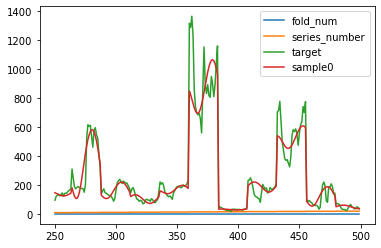

In [30]:
forcast_list1[0].iloc[250:500].plot()

In [47]:
from copy import deepcopy
# sort the forcast lists based on their original time series
def sort_forecast(forcast_list_val):
    sorted_list = []
    for el in forcast_list_val:
        new_el = deepcopy(el)
        new_el.index.rename('id', inplace=True)
        new_el.rename(columns={'series_number':'train_series_number'}, inplace=True)
        new_el.rename(columns={'sample0':'mean'}, inplace=True)
        new_el.sort_values(by=['train_series_number','id'], inplace=True)
        new_el.index = range(new_el.shape[0])
        sorted_list.append(new_el)
    return sorted_list
        
sorted_forcast_list1 = sort_forecast(forcast_list1)
# sorted_forcast_list2 = get_sorted_csv(forcast_list2)

In [48]:
sorted_forcast_list1[0].head(169)
# forcast_list1[0].head(169)

,fold_num,train_series_number,timestamp,target,mean
0,1.0,0,2014-05-26 20:00:00,9.0,6.935253
1,1.0,0,2014-05-26 21:00:00,10.0,7.887085
2,1.0,0,2014-05-26 22:00:00,22.0,8.809139
3,1.0,0,2014-05-26 23:00:00,20.0,9.658505
4,1.0,0,2014-05-27 00:00:00,13.0,10.396960
...,...,...,...,...,...
164,1.0,0,2014-05-27 16:00:00,6.0,4.581128
165,1.0,0,2014-05-27 17:00:00,10.0,5.282555
166,1.0,0,2014-05-27 18:00:00,9.0,6.055130
167,1.0,0,2014-05-27 19:00:00,9.0,6.837960


In [49]:
target_forcast_series = get_forcast_target(forcast_list1)

In [50]:
# this dataframe is just one time series
ts_number = 313
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

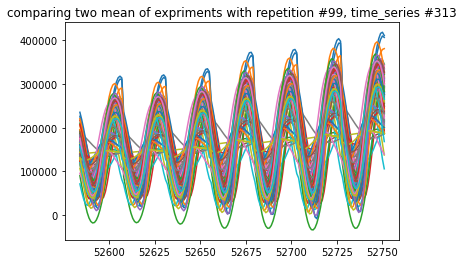

In [55]:
# plot mean of only one time series
rep_no = 0
for rep_no in range(100):
    plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
    ts_list1[rep_no]['mean'].plot()

## We want to compare the number of time points on experiment underpredict. 
Question is are experiments with worst MAPE, underpredict most of the time?

In [68]:
# question: is the worse one always underpredict?
# we need to use compare means, but I need to change the function
# experiment A
expA_worst_compare = (sorted_forcast_list1[26]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_best_compare = (sorted_forcast_list1[39]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_highest_compare = (sorted_forcast_list1[76]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_lowest_compare = (sorted_forcast_list1[35]['mean'] < sorted_forcast_list1[0]['target']).value_counts()

# # experiment B
# expB_worst_compare = (sorted_forcast_list2[63]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_best_compare = (sorted_forcast_list2[68]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_highest_compare = (sorted_forcast_list2[8]['mean'] < sorted_forcast_list2[0]['target']).value_counts()

In [69]:
# outputs the proportion of true experiences over all the experiences
def compare_two_series(seriesTrue, seriesFalse):
    return seriesTrue/(seriesTrue + seriesFalse)

underpred_A_best = compare_two_series(expA_best_compare[True], expA_best_compare[False])
underpred_A_worst = compare_two_series(expA_worst_compare[True], expA_worst_compare[False])
underpred_A_highest = compare_two_series(expA_highest_compare[True], expA_highest_compare[False])
underpred_A_lowest = compare_two_series(expA_lowest_compare[True], expA_lowest_compare[False])


print(f'percentage of underprediction of worst repetition for experiment A = {underpred_A_worst}')
print(f'percentage of underprediction of best repetition for experiment A = {underpred_A_best}')
print(f'percentage of underprediction of highest repetition for experiment A = {underpred_A_highest}')
print(f'percentage of underprediction of lowest repetition for experiment A = {underpred_A_lowest}')




percentage of underprediction of worst repetition for experiment A = 0.6773290313009939
percentage of underprediction of best repetition for experiment A = 0.747533748701973
percentage of underprediction of highest repetition for experiment A = 0.24755229194481532
percentage of underprediction of lowest repetition for experiment A = 0.8813974187805963


In [58]:
# find the one with the highest prediction
get_highest_prediction_id(sorted_forcast_list1, high_flag=False), get_highest_prediction_id(sorted_forcast_list1, high_flag=True)

(35, 76)

In [59]:
# find max difference between each experiments with itself and also combined
# combined_forecast_list = sorted_forcast_list1 + sorted_forcast_list2
# combined_max_tuple, _ = get_max_difference_pair(combined_forecast_list)
expA_max_tuple, _ = get_max_difference_pair(sorted_forcast_list1)
# expB_max_tuple, _ = get_max_difference_pair(sorted_forcast_list2)

In [60]:
print(f'the most different tuples of experiment A is: {expA_max_tuple}')
# print(f'the most different tuples of experiment B is: {expB_max_tuple}')
# print(f'the most different tuples of Combined experiments is: {combined_max_tuple}')

the most different tuples of experiment A is: (76, 32)


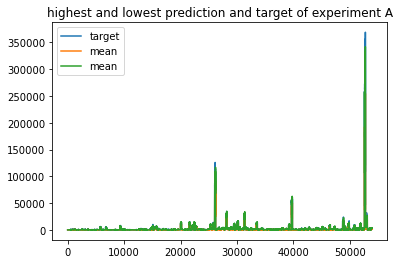

In [66]:
plt.title('highest and lowest prediction and target of experiment A')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[35]['mean'].plot(legend=True)
sorted_forcast_list1[76]['mean'].plot(legend=True)
# plt.xlim([10500,10850])
# plt.ylim([0.04,0.24])

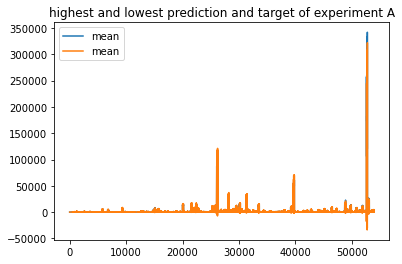

In [67]:
plt.title('highest and lowest prediction and target of experiment A')
# sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[76]['mean'].plot(legend=True)
sorted_forcast_list1[32]['mean'].plot(legend=True)
# plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

## find the tuples for all the time series (it takes much time)

In [26]:
# get all the 321 pairs here
lower_pair_list = []
higher_pair_list = []

for i in range(321):
    # lower values
    higher_flag = False
    idx_dif, mx_dif, l_list = get_max_diff_id(i, sorted_forcast_list1, sorted_forcast_list2, higher_flag)
    lower_pair_list.append(idx_dif)
    break
    # higher values
    # higher_flag = True
    # idx_dif, mx_dif, l_list = get_max_diff_id(i, sorted_forcast_list1, sorted_forcast_list2, higher_flag)
    # higher_pair_list.append(idx_dif)


NameError: name 'sorted_forcast_list1' is not defined

In [27]:
# calculating the most appeared pairs
import statistics 
from statistics import mode 

mode(lower_pair_list), mode(higher_pair_list)

StatisticsError: no mode for empty data

## take the average of experiment A and B and plot them
the reults show that after running 100 times, the average of results are converging.

In [28]:
ts_no = 1

# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)


means_A = np.zeros((len(ts_list1) , ts_list1[0]['mean'].shape[0]))
# means_B = np.zeros((len(ts_list2) , ts_list2[0]['mean'].shape[0]))


for idx, ts_df1 in enumerate(ts_list1):
    means_A[idx] = ts_df1['mean'].to_numpy()
# for idx, ts_df2 in enumerate(ts_list2):
#     means_B[idx] = ts_df2['mean'].to_numpy()

mean_means_A = means_A.mean(axis=0)
# mean_means_B = means_B.mean(axis=0)

plt.title(f'mean of experiment A and B on dataset {ts_no}')
plt.plot(mean_means_A, color='r')
# plt.plot(mean_means_B, color='red')
plt.plot(ts_list1[0]['target'].to_numpy())
# mean1 = ts_list1[0]['mean'].to_numpy()
# mean1.shape

NameError: name 'sorted_forcast_list1' is not defined

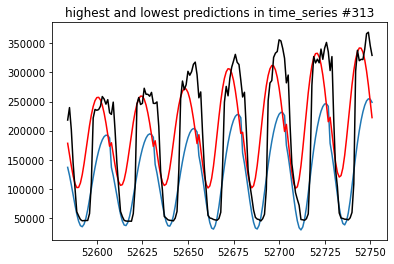

In [76]:
# this dataframe is just one time series
ts_number = 313
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)

plt.title(f'highest and lowest predictions in time_series #{ts_number}')

rep_no = 35
ts_list1[rep_no]['mean'].plot()

rep_no = 76
ts_list1[rep_no]['mean'].plot(color='red')

ts_list1[rep_no]['target'].plot(color='black')